<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [69]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [85]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


In [86]:
#missing value in 'ConvertedCompYearly' column
df['ConvertedCompYearly'].isna().sum()

np.int64(42002)

In [87]:
#check unique value
print('\nThere are', df['ConvertedCompYearly'].nunique(), 'unique ConvertedCompYearly values in the survey:')
print(df['ConvertedCompYearly'].value_counts())


There are 6113 unique ConvertedCompYearly values in the survey:
ConvertedCompYearly
64444.0     321
53703.0     308
75184.0     230
85925.0     226
107406.0    208
           ... 
9711.0        1
950000.0      1
51448.0       1
447569.0      1
4738.0        1
Name: count, Length: 6113, dtype: int64


In [90]:
import numpy as np
#calculate the mean value for the "ConvertedCompYearly" column
avg_convcompyearly = df["ConvertedCompYearly"].astype("float").mean(axis=0)
print("Average of ConvertedCompYearly:", avg_convcompyearly)

#replace the missing 'ConvertedCompYearly' values by the mean value
df["ConvertedCompYearly"].replace(np.nan, avg_convcompyearly, inplace=True)

Average of ConvertedCompYearly: 86155.28726264134


/tmp/ipykernel_300/3785090385.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ConvertedCompYearly"].replace(np.nan, avg_convcompyearly, inplace=True)


In [92]:
#check missing value again
#missing value in 'ConvertedCompYearly' column
df['ConvertedCompYearly'].isna().sum()

np.int64(0)

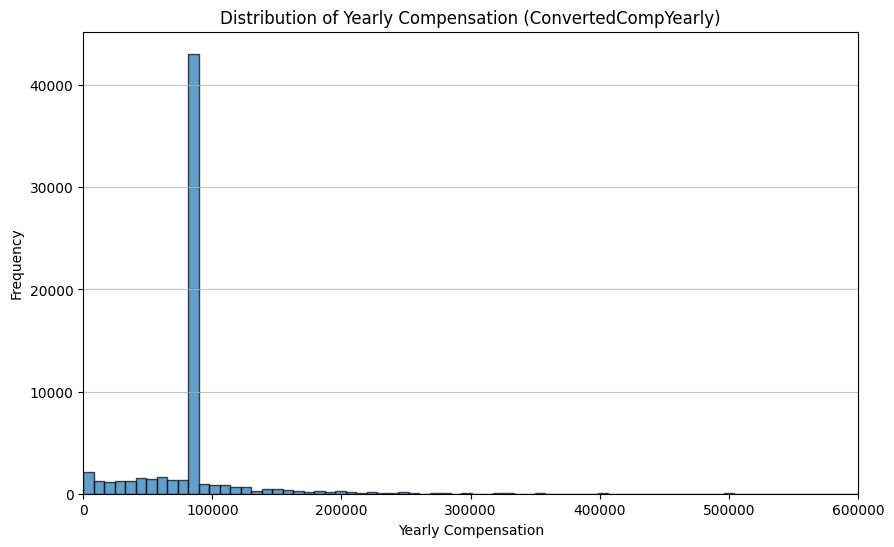

In [93]:
#plotting the histogram
plt.figure(figsize=(10, 6))
df['ConvertedCompYearly'].plot.hist(bins=2000, edgecolor='black', alpha=0.7) # 'bins' controls the number of bars
plt.title('Distribution of Yearly Compensation (ConvertedCompYearly)')
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')
plt.xlim(0, 600000)
plt.grid(axis='y', alpha=0.75)
plt.show()

<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [94]:
#missing value in 'ConvertedCompYearly' column
df['ConvertedCompYearly'].isna().sum()

np.int64(0)

In [95]:
#missing value in 'Employment' column
df['Employment'].isna().sum()

np.int64(0)

In [96]:
#filter the DataFrame for "Employed, full-time" respondents
full_time_employed_df = df[df['Employment'] == 'Employed, full-time']

#calculate the median of the 'ConvertedCompYearly' column from the filtered data
median_compensation = full_time_employed_df['ConvertedCompYearly'].median()

print(f"The median annual compensation for full-time employed respondents is: {median_compensation}")

#Alternatively, you can perform the filtering and median calculation in one line:
#median_compensation_one_line_df = df[df['Employment'] == 'Employed, full-time']['ConvertedCompYearly'].median()
#print(f"The median annual compensation for full-time employed respondents is (one code): {median_compensation_one_line_df}")

The median annual compensation for full-time employed respondents is: 86155.28726264134


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



In [97]:
#missing value in 'Country' column
df['Country'].isna().sum()

np.int64(6507)

In [98]:
#check unique value
print('\nThere are', df['Country'].nunique(), 'unique Country values in the survey:')
print(df['Country'].value_counts())


There are 185 unique Country values in the survey:
Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64


In [99]:
#filter the DataFrame to keep only necessary columns and drop rows with missing values
filtered_df = df[['Country', 'ConvertedCompYearly']].dropna()

#calculate the median of 'ConvertedCompYearly' for each country and save as a new DataFrame
median_per_country = filtered_df.groupby('Country')['ConvertedCompYearly'].median().reset_index()

#rename the column for clarity
median_per_country.rename(columns={'ConvertedCompYearly': 'MedianCompYearly'}, inplace=True)

#rank for the 10 countries with the higher ConvertedCompYearly median
#sort in descending order and select the top 10
top_10_countries_median = median_per_country.sort_values(by='MedianCompYearly', ascending=False).head(10)

#optional: filter the original (filtered) data to only include the top 10 countries for plotting
top_10_countries_names = top_10_countries_median['Country'].tolist()
df_top_10 = filtered_df[filtered_df['Country'].isin(top_10_countries_names)]

print("Top 10 countries by median compensation:")
print(top_10_countries_median)

Top 10 countries by median compensation:
                Country  MedianCompYearly
68                Haiti      90000.000000
1               Albania      86155.287263
2               Algeria      86155.287263
3               Andorra      86155.287263
4                Angola      86155.287263
5   Antigua and Barbuda      86155.287263
6             Argentina      86155.287263
7               Armenia      86155.287263
0           Afghanistan      86155.287263
9               Austria      86155.287263


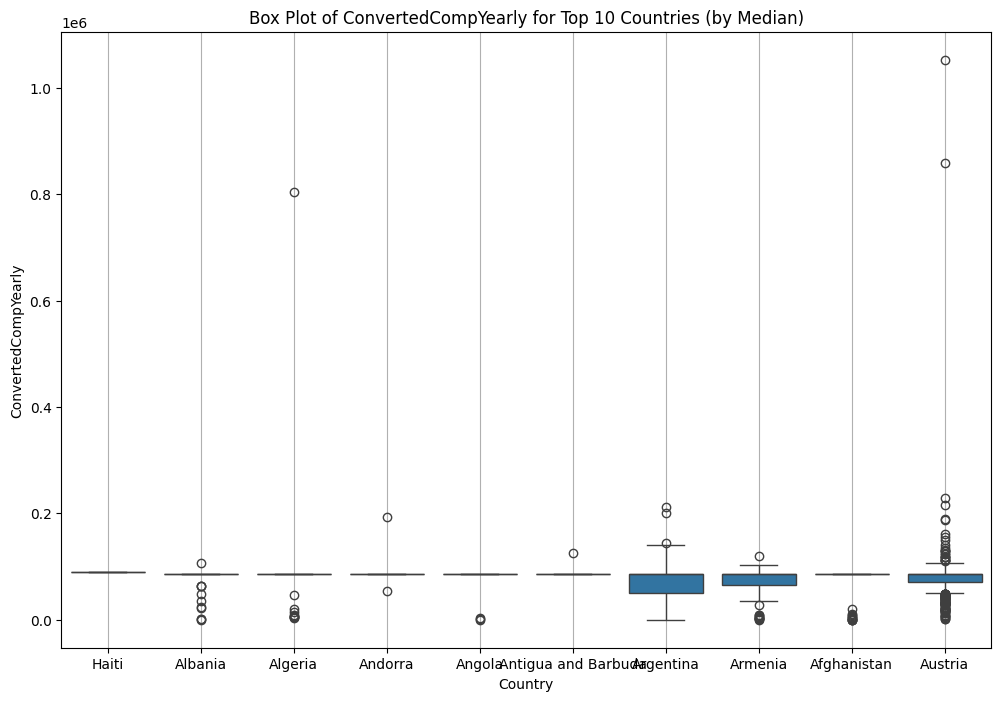

In [100]:
#create a box plot of 'ConvertedCompYearly' for each of the top 10 countries
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10, x='Country', y='ConvertedCompYearly',
            order=top_10_countries_median['Country'])
plt.title('Box Plot of ConvertedCompYearly for Top 10 Countries (by Median)')
plt.xlabel('Country')
plt.ylabel('ConvertedCompYearly')
plt.grid(True, axis='x')
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [101]:
#calculate Q1 and Q3
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

#calculate IQR
IQR = Q3 - Q1

#define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#create a new DataFrame without outliers
df_cleaned = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

print("\nCleaned DataFrame (outliers removed from ConvertedCompYearly):")
print(df_cleaned)


Cleaned DataFrame (outliers removed from ConvertedCompYearly):
       ResponseId                      MainBranch                 Age  \
0               1  I am a developer by profession  Under 18 years old   
1               2  I am a developer by profession     35-44 years old   
2               3  I am a developer by profession     45-54 years old   
3               4           I am learning to code     18-24 years old   
4               5  I am a developer by profession     18-24 years old   
...           ...                             ...                 ...   
65432       65433  I am a developer by profession     18-24 years old   
65433       65434  I am a developer by profession     25-34 years old   
65434       65435  I am a developer by profession     25-34 years old   
65435       65436  I am a developer by profession     18-24 years old   
65436       65437     I code primarily as a hobby     18-24 years old   

                Employment                            Remot

<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


In [102]:
df.info('ResponseId')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

In [104]:
#check missing value
df['WorkExp'].isna().sum()

np.int64(35779)

In [105]:
df['JobSatPoints_1'].isna().sum()

np.int64(36113)

In [106]:
#check unique value
print('\nThere are', df['WorkExp'].nunique(), 'unique WorkExp values in the survey:')
print(df['WorkExp'].value_counts())

print('\nThere are', df['JobSatPoints_1'].nunique(), 'unique JobSatPoints_1 values in the survey:')
print(df['JobSatPoints_1'].value_counts())


There are 51 unique WorkExp values in the survey:
WorkExp
3.0     2144
5.0     2050
10.0    2029
2.0     1885
4.0     1767
6.0     1600
7.0     1581
8.0     1554
1.0     1461
15.0    1250
12.0    1249
20.0    1074
9.0      982
11.0     823
25.0     794
13.0     740
14.0     655
16.0     600
17.0     596
18.0     587
30.0     461
24.0     382
19.0     330
22.0     323
23.0     269
26.0     254
21.0     251
27.0     217
35.0     217
28.0     210
0.0      192
40.0     139
29.0     117
32.0     101
33.0      90
36.0      89
34.0      84
31.0      83
37.0      60
38.0      55
50.0      53
42.0      47
45.0      46
39.0      37
41.0      36
43.0      34
44.0      32
46.0      12
48.0       7
47.0       5
49.0       4
Name: count, dtype: int64

There are 91 unique JobSatPoints_1 values in the survey:
JobSatPoints_1
0.0     11271
10.0     4010
20.0     2909
5.0      1496
30.0     1309
        ...  
47.0        1
83.0        1
43.0        1
7.5         1
36.0        1
Name: count, Length: 91, 

In [107]:
#impute (replace) all the empty rows in the column Work Exp & JobSatPoints_1  with the majority value
df['WorkExp'].replace(np.nan,3.0, inplace=True)
df['JobSatPoints_1'].replace(np.nan,0.0, inplace=True)

/tmp/ipykernel_300/1306031759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WorkExp'].replace(np.nan,3.0, inplace=True)
/tmp/ipykernel_300/1306031759.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

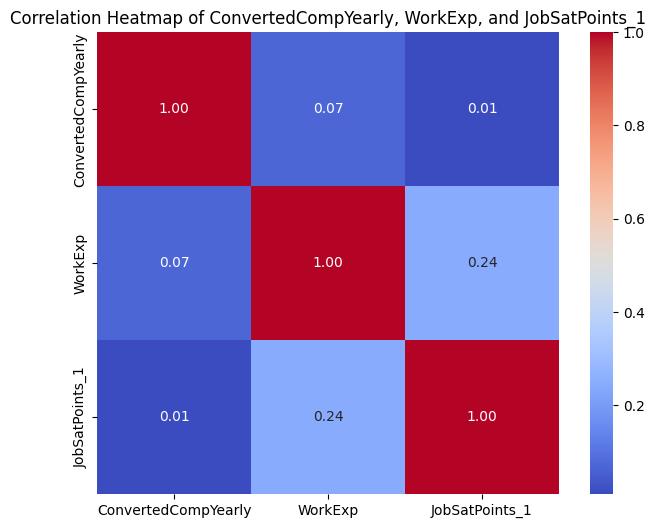

In [109]:
#calculate the correlation matrix
df_subset = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']]
correlation_matrix = df_subset.corr()

#visualize the correlations with a heatmap
plt.figure(figsize=(8, 6)) # Set the figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of ConvertedCompYearly, WorkExp, and JobSatPoints_1')
plt.show()

<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


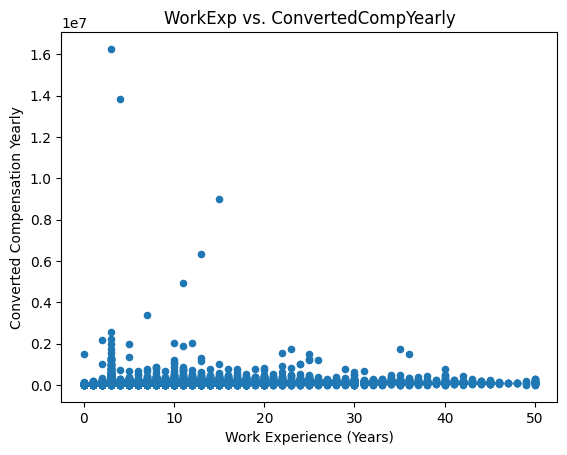

In [110]:
#create the first scatter plot: WorkExp vs. ConvertedCompYearly
df.plot.scatter(x='WorkExp', y='ConvertedCompYearly', title='WorkExp vs. ConvertedCompYearly')
plt.xlabel('Work Experience (Years)')
plt.ylabel('Converted Compensation Yearly')
plt.show()

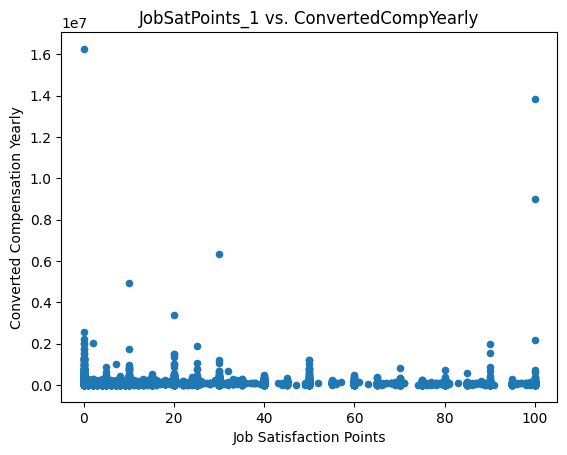

In [111]:
#create the second scatter plot: JobSatPoints_1 vs. ConvertedCompYearly
df.plot.scatter(x='JobSatPoints_1', y='ConvertedCompYearly', title='JobSatPoints_1 vs. ConvertedCompYearly')
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Converted Compensation Yearly')
plt.show()

<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
